## 1 - Imports and methods

In [7]:
# import required packages

import pandas as pd
import numpy as np
import re
import global_options
from pathlib import Path
from cleantext import clean # install via: pip install clean-text

#import the word-lists
expanded_dict = pd.read_csv(Path(global_options.OUTPUT_FOLDER, "dict", "expanded_dict.csv"))
wordlist = [x.replace('_',' ') for x in list(expanded_dict['ai'].dropna())]

In [8]:
# required methods

def get_ngrams(s, n):
    '''
    tokenize an input text 
    source: https://albertauyeung.github.io/2018/06/03/generating-ngrams.html
    '''
    # Convert to lowercases
    s = s.lower()
    
    # Replace all none alphanumeric characters with spaces
    s = re.sub(r'[^a-zA-Z0-9\s]', ' ', s)
    
    # Break sentence in the token, remove empty tokens
    tokens = [token for token in s.split(" ") if token != ""]
    
    # Use the zip function to help us generate n-grams
    # Concatentate the tokens into ngrams and return
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return [" ".join(ngram) for ngram in ngrams]

def cleaner(txt):    
    '''
    Clean the input text
    '''
    return clean(
        txt,
        fix_unicode=True,               # fix various unicode errors
        to_ascii=True,                  # transliterate to closest ASCII representation
        lower=True,                     # lowercase text
        no_line_breaks=True,           # fully strip line breaks as opposed to only normalizing them
        no_urls=True,                  # replace all URLs with a special token
        no_emails=True,                # replace all email addresses with a special token
        no_phone_numbers=True,         # replace all phone numbers with a special token
        no_numbers=True,                # replace all numbers with a special token
        no_digits=True,                 # replace all digits with a special token
        no_currency_symbols=True,      # replace all currency symbols with a special token
        no_punct=True,                 # remove punctuations
        replace_with_punct="",          # instead of removing punctuations you may replace them
        replace_with_url="",
        replace_with_email="",
        replace_with_phone_number="",
        replace_with_number="",
        replace_with_digit="",
        replace_with_currency_symbol="",
        lang="en"                       # set to 'de' for German special handling
        )

def score_calculator(text):
    '''
    return the biodiversity scores for an input text
    '''
    try:      
        text=re.sub('[\\n]','',text)
        text=get_ngrams(text,1)+get_ngrams(text,2)+get_ngrams(text,3)+get_ngrams(text,4)
        counts=[]
        counts= [text.count(x) for x in wordlist]
        freq=sum(counts) 
        diversity = len([x for x in counts if x!=0])    
        return diversity/len(wordlist)
    except Exception as ex:
        print(ex)
        return 0


## 2 - Score calculation

In [9]:
# An example
# text from copy paste of the https://www.ft.com/content/f37f3af3-2c3a-4082-84c3-e6fe7fe53252

text=''' Gender gap in tech jobs narrows across advanced economies Valentina Romei and Delphine Strauss in London Women’s share of tech jobs has increased across advanced economies since the pandemic, helped by strong demand, gender equality policies and greater tolerance of flexible working arrangements. The notoriously large gender gap in the tech sector has narrowed across the US, EU and the UK in the past four years, an FT analysis of official data shows. Yet despite the improvement in the gender balance, men still dominate employment in the sector. That has led to calls for greater diversity in hiring at a time when the industry is developing crucial new artificial intelligence technologies. “We are just at a critical point with regard to AI,” said Athene Margaret Donald, professor emerita of experimental physics at the University of Cambridge. “You need a diverse workforce to make sure . . . that you find some way around any bias that is present. We need more minorities, women, people of colour in the room to make sure that we get this right.” In the US, the proportion of female workers in tech rose from 31 per cent in 2019 to 35 per cent by the end of 2023, according to data from the US Bureau of Labor Statistics. There were just under 900,000 female workers in computer programming and related services out of 2.5mn in total last year. The proportion of women working in computer programming and related services across the EU rose from 23 per cent before the pandemic to 25.2 per cent at the end of 2023, with increases in most EU countries, including Germany, France and Denmark, according to official Eurostat data. In the UK, the proportion rose from 29 per cent in 2019 to more than 32 per cent throughout last year. Strong demand for IT jobs since the pandemic has been an important factor, economists argue. In the EU, computer programming employed roughly the same number of people as accommodation until 2016, but now it’s nearly twice as big. In the US, the number of those jobs rose by 15 per cent in December 2023 compared with the same month in 2019, much stronger than the 1.5 per cent overall employment growth over the same period. Women’s share of the tech workforce is increasing partly because there are now more tech jobs in banks and consumer goods companies, said Bianca Stringuini, head of equality, diversity and inclusion at the recruitment group Hays. Such companies “are looking for diverse talent because they need to fill positions and there are still inherent skills shortages in these areas”, she said. In the US, she said, more women are taking roles in areas such as cyber threat detection and testing that have traditionally been male-dominated. “We are starting now to see women in all areas of tech as the market grows,” said Stringuini. More flexible working arrangements have also helped. Facebook has said that candidates who accepted remote job offers were more likely to be women. Companies that only require people in the office for one or two days a week hire 27 per cent more women than those with five-day mandates, a report by digital services consultancy Nash Squared found. Tech giants are also improving the gender gap in their workforce. Women accounted for 25.3 per cent of Google’s new tech hiring in 2023, up from 20.8 per cent in 2018, according to the company’s diversity report. Overall female representation rose from 30.9 to 34.1 per cent over the same period. The female share of Microsoft’s workforce rose to 33.1 per cent in 2023, up from 29.2 per cent in 2019, with those in tech roles rising from 21.4 per cent to 26.6 per cent over the same time. Facebook and Apple showed similar trends. Yet the gender gap remains considerably wider in tech than in other large industries. In the US, just over one in three women work in the computer services sector compared with 50.3 of women in management consulting services, 65.9 in legal services and 55.6 per cent in financial services. “The chasm is gigantic,” said Karen Blake, co-chief executive officer at Tech Talent Charter, an industry-led membership group that promotes diversity and inclusion. The progression is “much too slow and very fragile”, she added. “It feels a little bit like drops in oceans.” Women are still being discouraged from tech subjects from their early years, according to Donald, meaning there are fewer female workers with tech skills. “Our society . . . discourages girls from taking subjects like physics or computing practically from birth.” There is also the risk that the trend could slow or even reverse as hybrid work retreats and big tech companies report widespread job lay-offs amid cooling demand and disruption from AI. Progress in gender equality in the tech sector is “glacially slow”, said Andy Heyes, UK and Ireland managing director at the specialist recruiter Harvey Nash. He argues post-pandemic gains were largely due to the greater acceptance of homeworking — and are now at risk as bosses press staff to return to the office. “Equality, diversity and inclusion is deprioritised in a downturn.”'''


In [10]:
score = score_calculator(text)
print('''AI Score: {0} '''.format(np.round(score, 3)))

AI Score: 0.022 


## 3 - Wordcloud

In [11]:
# imports
import matplotlib.pyplot as plt
from wordcloud import WordCloud # install via: pip install wordcloud
from IPython.display import Image


expanded_dict = pd.read_csv(Path(global_options.OUTPUT_FOLDER, "dict", "expanded_dict.csv"))
wordlist = [x.replace('_',' ') for x in list(expanded_dict['ai'].dropna())]

# definitaions
def word_cloud(text):
    try:      
        text=re.sub('[\\n]','',text)
        text=get_ngrams(text,1)+get_ngrams(text,2)+get_ngrams(text,3)+get_ngrams(text,4)
        counts=[]
        counts= [text.count(x) for x in wordlist]
        dic=dict(zip(wordlist, counts))
       
    except Exception as ex:
        print(ex)
        dic={' ':1}

    mydictionary = {}
    mydictionary.update(dic)
    
    wordcloud = WordCloud(width = 1000, height = 500, background_color='white').generate_from_frequencies(mydictionary)
    plt.figure(figsize=(15,8))
    plt.axis("off")
    plt.imshow(wordcloud)
    plt.show()

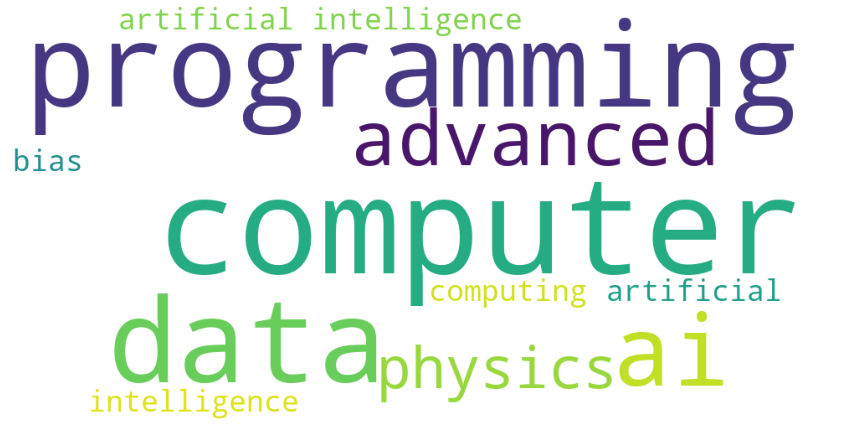

In [12]:
word_cloud(text)